In [1]:
# Goal: estimate the iPTF13bvn oxygen mass in the late-time nebular spectrum
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
sds = specds.load_dataset('iPTF13bvn')

In [3]:
spec_n = sds.names[-1]
spec = sds[spec_n]
spec.meta

OrderedDict([('time', 56766.0),
             ('phase', 289.0),
             ('filename', 'iptf13bvn_20140418_kuncarayakti.dat'),
             ('file_name', 'iptf13bvn_20140418_kuncarayakti.dat'),
             ('obs_mjd', 56766.0),
             ('name', 'iptf13bvn_20140418_kuncarayakti')])

In [4]:
spec = spec[~np.isnan(spec['flux'])]
spec

<Table length=1954>
  obswave        restwave                flux          mask
  float64        float64               float64         bool
----------- ------------------ ----------------------- ----
     3800.0 3783.0142659459025  1.6554041598715332e-19 True
3802.560164 3785.5629861919974  -1.711338426939249e-18 True
3805.120327 3788.1117054425627  -3.880411865091991e-18 True
3807.680491 3790.6604256886576  1.1949725330201971e-17 True
3810.240655 3793.2091459347525  2.3411566245534326e-17 True
3812.800819 3795.7578661808475   7.137996158888255e-18 True
3815.360982 3798.3065854314127  4.1250497436079294e-18 True
3817.921146 3800.8553056775077  2.4520621323343777e-19 True
 3820.48131 3803.4040259236026 -2.3235111524207598e-18 True
3823.041474 3805.9527461696975  1.2988473042390899e-18 True
        ...                ...                     ...  ...
8776.958303   8737.72591364772   9.716712667356055e-19 True
8779.518467  8740.274633893816  1.0217842780424918e-18 True
8782.078631  8742.823354139911  2.5083352537631147e-19 True
8784.638795  8745.372074386007 -2.0310849407313196e-19 True
8787.198958  8747.920793636571    7.07087006735179e-19 True
8789.759122  8750.469513882665  1.5275254783796732e-18 True
8792.319286   8753.01823412876   2.194782270957019e-18 True
 8794.87945  8755.566954374857  1.2426183947471946e-18 True
8797.439613  8758.115673625422  1.0957738925277839e-18 True
8799.999777  8760.664393871517  1.2001839506874494e-18 True

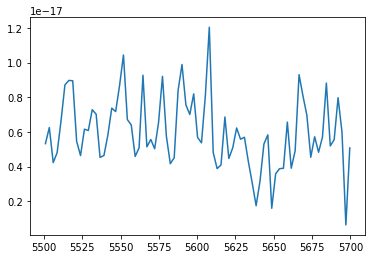

In [5]:
idx = np.logical_and(spec['restwave'] > 5500, spec['restwave'] < 5700)
plt.plot(spec['restwave'][idx], spec['flux'][idx])

In [6]:
cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5400, stop5577=5650, start6300_6364=6100, stop6300_6364=6540, extra_lines=np.array([]), max_width=27)

In [7]:
dist_mpc = 25.53
dist_mpc_err = 1.79
dist_min = (dist_mpc-dist_mpc_err) * u.pc.to(u.cm) * 1e6
dist_max = (dist_mpc+dist_mpc_err) * u.pc.to(u.cm) * 1e6
dist_range = (dist_min, dist_max)
#redshift2distance = utils.redshift2distance
results, samples = oxygen.run_dynesty_fit(cfg, dist_range=dist_range)

50157it [05:33, 150.56it/s, batch: 4 | bound: 405 | nc: 25 | ncall: 1245330 | eff(%):  4.028 | loglstar: -349.150 < -341.191 < -343.340 | logz: -375.476 +/-  0.243 | stop:  0.941]        


	Mean: array([ 2.05917803e+00,  2.67071540e+03,  2.27427381e+01,  6.15699119e-01,
        6.06265121e-01,  7.97617775e-04, -6.59413904e-04,  7.91884605e+25,
        5.98568466e-02,  7.41368670e-01, -1.37943605e+00,  6.96414639e-01])
	Cov: array([[ 2.77185306e+00, -5.97783378e+02,  5.40128163e-02,
		         3.16342413e-03,  3.11165104e-03, -5.22029377e-05,
		        -1.10815688e-05, -8.69060198e+23,  4.71373675e-02,
		        -5.71487830e-02, -1.43154807e-03, -6.36563631e-03],
		       [-5.97783378e+02,  1.92253632e+05, -5.47250615e+01,
		        -1.07970611e+00, -1.06745045e+00,  1.88243497e-02,
		         4.74897525e-03,  3.26160783e+26,  1.06867740e+02,
		         5.36464867e+01,  7.30352326e-01, -1.46679834e+01],
		       [ 5.40128163e-02, -5.47250615e+01,  2.60370874e+00,
		        -1.54416825e-03, -5.04864823e-03, -6.96267782e-06,
		         5.67582387e-06,  1.09371911e+22, -1.17351526e+00,
		        -1.32990678e-01,  3.83801282e-03, -1.94443786e-02],
		       [ 3.16342413e-03, -

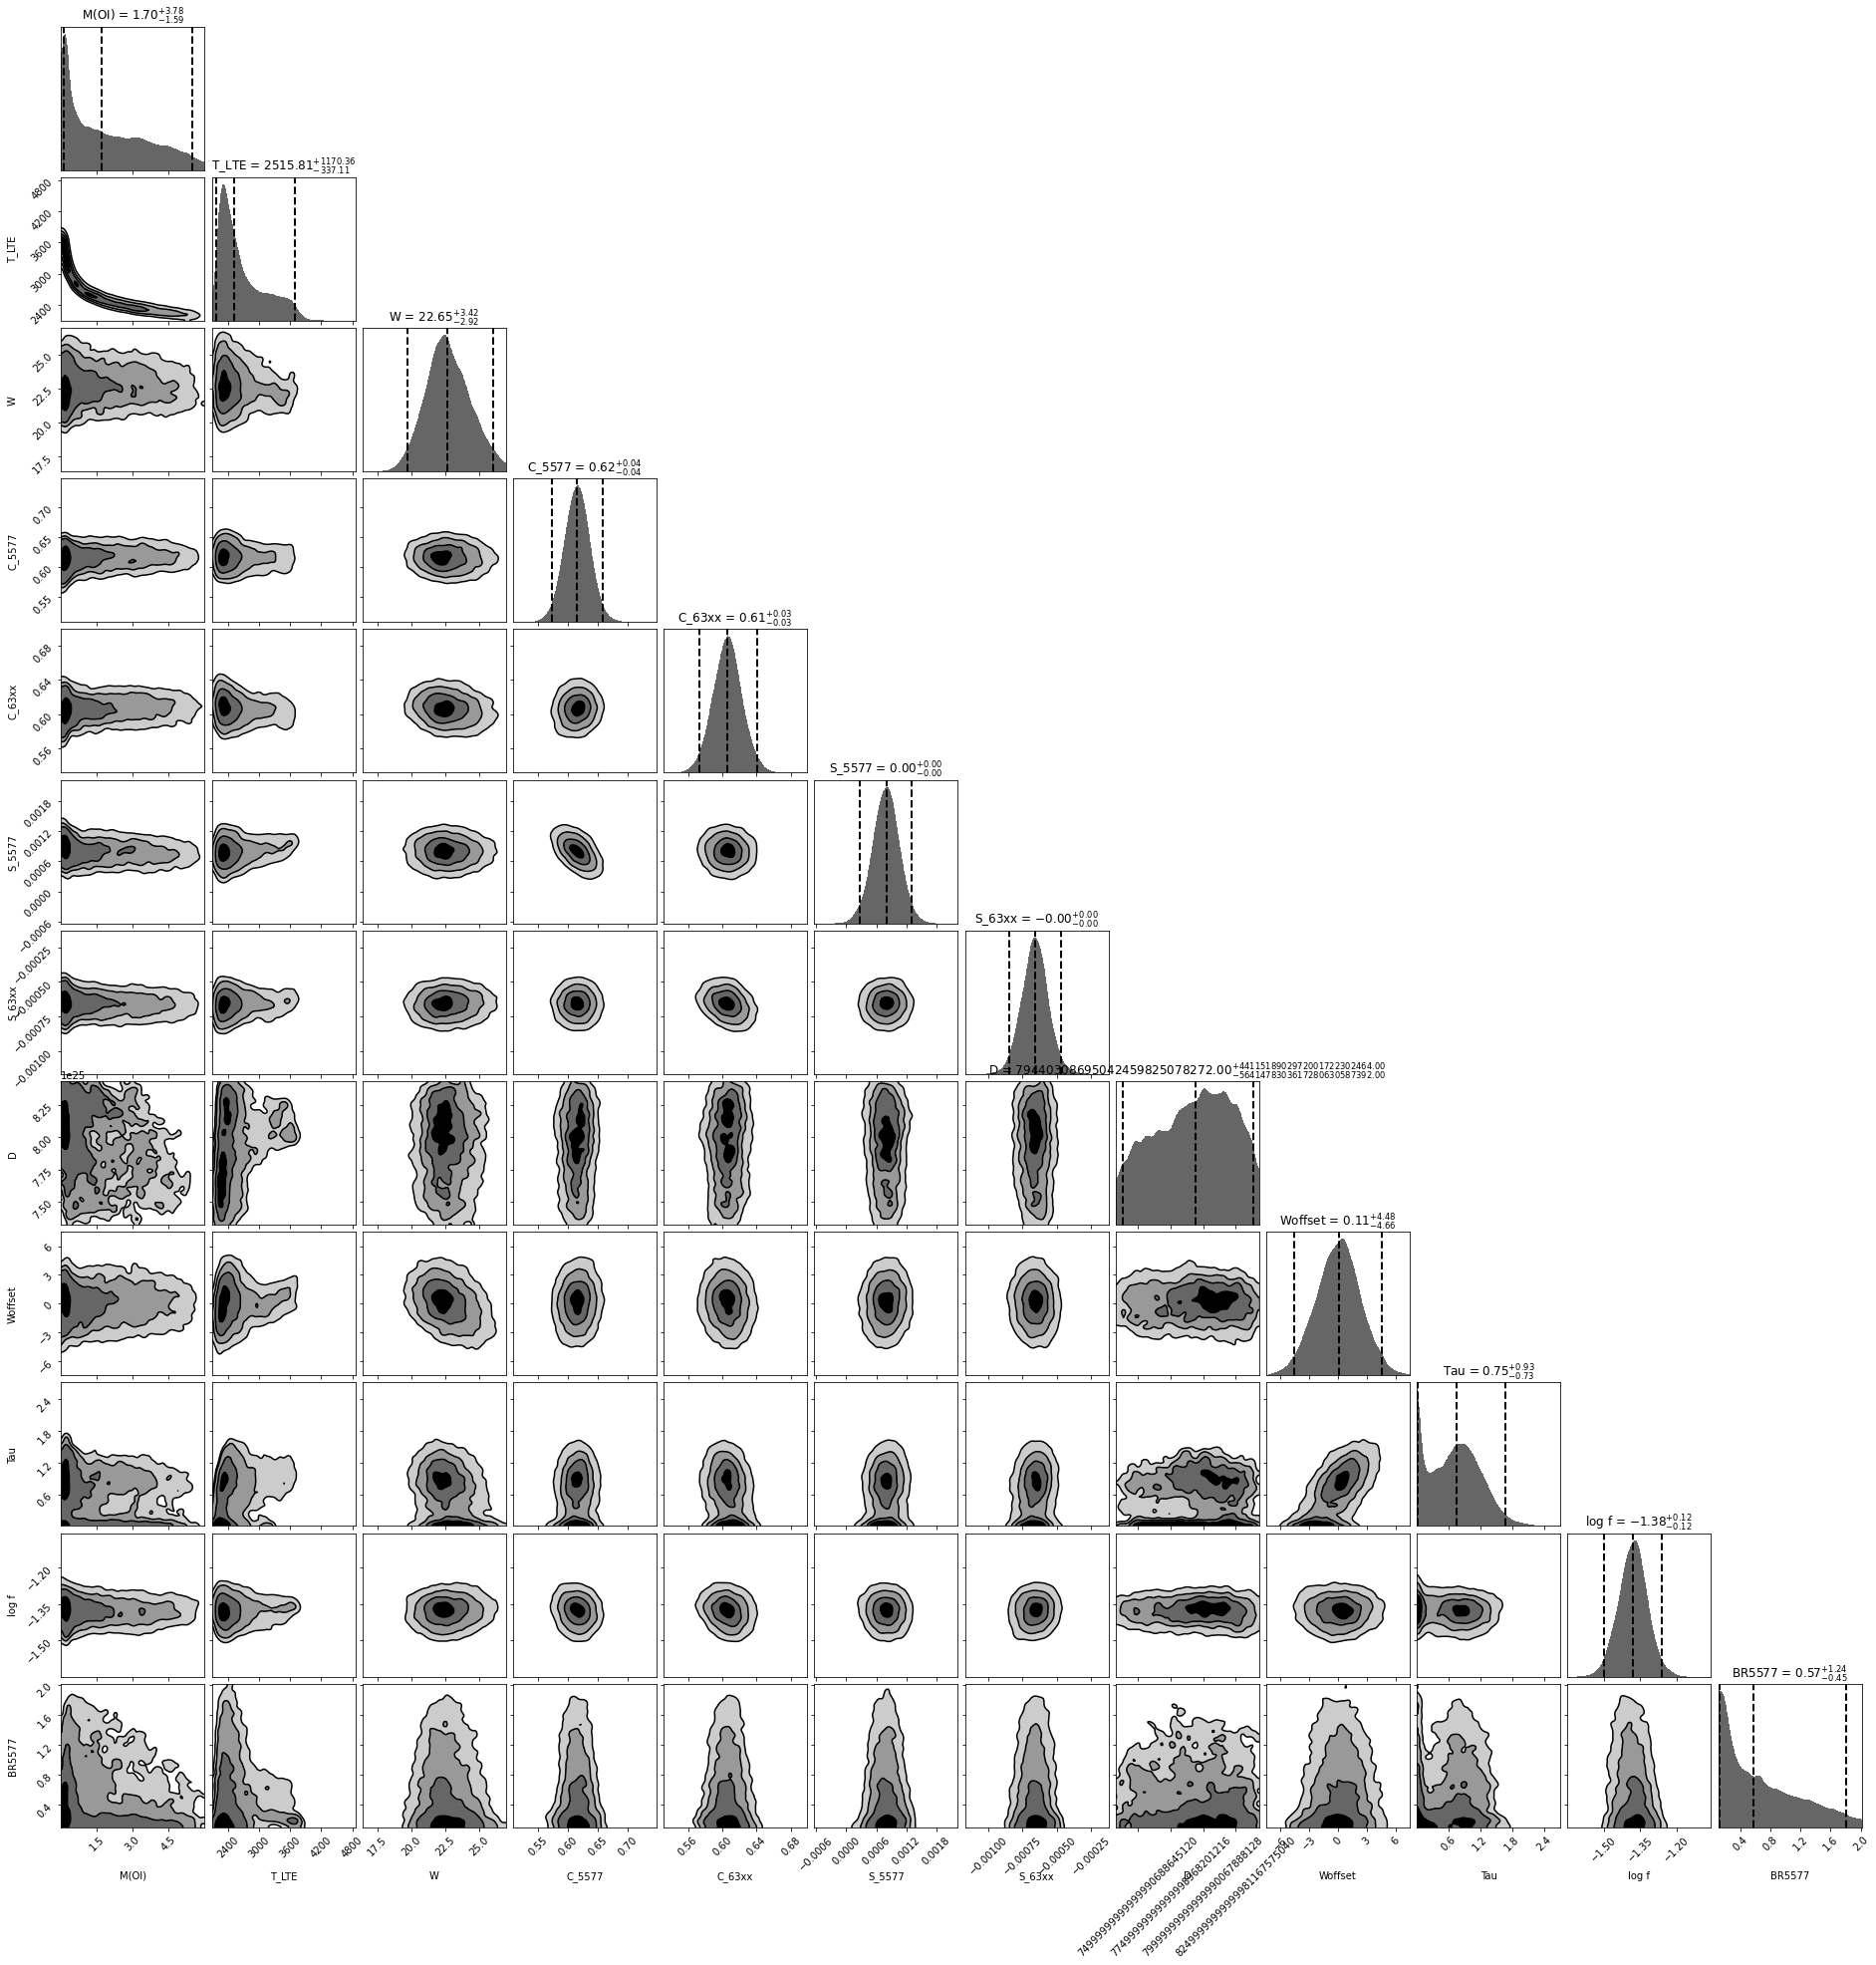

In [8]:
LABELS = ['M(OI)', 'T_LTE', 'W', 'C_5577', 'C_63xx', 'S_5577', 'S_63xx', 'D', 'Woffset', 'Tau', 'log f', 'BR5577', 'AmpE1', 'AmpE2', 'AmpE3', 'AmpE4']
_=dyplot.cornerplot(results, labels=LABELS, show_titles=True)

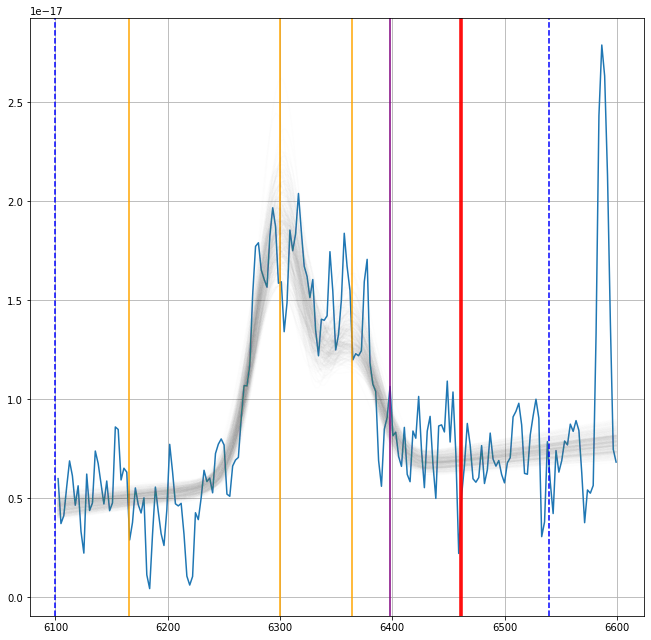

In [9]:
plt.figure(figsize=(11,11))

idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6600)
#idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6200)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
#continuum_level_6300_6364 = 0.3e-17
#continuum_slope_6300_6364 = 0.03/1e18
#amplitude_6300 = 1.3e-15
#amplitude_6364 = 0.5e-15
#line_width = 16
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width)

samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)

plt.axvline(6300, color='orange')
plt.axvline(6364, color='orange')
plt.axvline(6158+7.3, color='orange')

extra_idx = cfg.extra_lines > 6000

#print(len(new_samples))
#print(cfg.extra_lines.dtype)
for i in range(300):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    #p[0] /= 1.3
    #oxygen_masses[i] = p[0]
    
    line_width = p[2]#*1.3
    wlen_offset = p[8]
    #line_skew = p[12]
    #p[9] -= 3

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17
    
    extra_lines_amps = np.exp(p[12:])/1e17
    #extra_lines_amps = np.exp([6])/1e17
    #print(extra_lines_amps.dtype)

    fluxes = oxygen.create_fluxes(p)
    #fluxes = create_fluxes(p)
    
    amplitude_5577 = fluxes[0]
    amplitude_6300 = fluxes[1]
    amplitude_6364 = fluxes[2]
    
    #print(spec['restwave'][idx]+wlen_offset)
    modflux = np.empty(len(spec['restwave'][idx]))
    for j in range(len(modflux)):
        modflux[j] = oxygen.generation_func_6300_6364((spec['restwave'][idx]+wlen_offset)[j], continuum_level_6300_6364, continuum_slope_6300_6364, amplitude_6300, amplitude_6364, line_width, cfg.extra_lines[extra_idx], extra_lines_amps[extra_idx])
    plt.plot(spec['restwave'][idx], modflux, alpha=0.01, color='grey')
plt.axvline(cfg.start6300_6364, color='blue', ls='--')
plt.axvline(cfg.stop6300_6364, color='blue', ls='--')

for l in cfg.extra_lines[extra_idx]:
    plt.axvline(l+7.3, color='cyan')

plt.axvline(6391+7.3, color='purple')
plt.axvline(6453+7.3, color='red')
plt.axvline(6454+7.3, color='red')
plt.axvline(6455+7.3, color='red')
#plt.axvline(6726, color='red')
#plt.axvline(, color='red')
    
plt.grid()

In [12]:
idx = new_samples[:,0] < 2
plt.hist2d(new_samples[:,0][idx], new_samples[:,1][idx], bins=100);
plt.axvline(0.3)

In [13]:
np.percentile(new_samples[:,0], 13)

0.21582749447356403